# Histogram of Oriented Gradients(HOG)

## features from the training images

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to extract features from a list of images
def extract_features(imgs, cspace='RGB', spatial_size=(32,32), hist_bins=32, hist_range=(0,256),
                     orient=9, pix_per_cell=8, cell_per_block=2, hog_channel=0,
                     spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        img_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)
        # spatial features is flag is true
        if spatial_feat == True:
            # Apply bin_spatial() to get spatial color features
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            # Append the new feature vector to the features list
            img_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist() also with a color space option now
            hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
            img_features.append(hist_features)
        if hog_feat == True:
            # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            img_features.append(hog_features)
        # Append the new feature vector to the features list
        features.append(np.concatenate(img_features))
    # Return list of feature vectors
    return features

In [2]:
# Read in cars and notcars
cars = []
notcars = []
for car in glob.glob('/home/oilpig/Downloads/P5/vehicles/**/*.png', recursive=True):
    cars.append(car)
for notcar in glob.glob('/home/oilpig/Downloads/P5/non-vehicles/**/*.png', recursive=True):
    notcars.append(notcar)

# Reduce the sample size
sample_size = len(cars)
# sample_size = 5
cars = cars[0:sample_size]
sample_size = len(notcars)
# sample_size = 5
notcars = notcars[0:sample_size]

%matplotlib inline
if sample_size < 5:
    for car in cars:
        image = mpimg.imread(car)
        print(image*255)
        plt.figure()
        plt.imshow(image)        
    for notcar in notcars:
        image = mpimg.imread(notcar)
        plt.figure()
        plt.imshow(image)

## hog featurea example

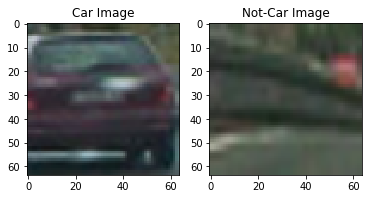

In [90]:
car_ind = np.random.randint(0, sample_size)

plt.subplot(121)
plt.imshow(mpimg.imread(cars[car_ind]))
plt.title('Car Image')
plt.subplot(122)
plt.imshow(mpimg.imread(notcars[car_ind]))
plt.title('Not-Car Image')

car_sample = mpimg.imread(cars[car_ind])

1: Orient: 8.0 Pix: 7.0 Cell: 1.0
2: Orient: 8.0 Pix: 7.0 Cell: 2.0
3: Orient: 8.0 Pix: 7.0 Cell: 3.0
4: Orient: 8.0 Pix: 8.0 Cell: 1.0
5: Orient: 8.0 Pix: 8.0 Cell: 2.0
6: Orient: 8.0 Pix: 8.0 Cell: 3.0
7: Orient: 8.0 Pix: 9.0 Cell: 1.0
8: Orient: 8.0 Pix: 9.0 Cell: 2.0
9: Orient: 8.0 Pix: 9.0 Cell: 3.0
10: Orient: 9.0 Pix: 7.0 Cell: 1.0
11: Orient: 9.0 Pix: 7.0 Cell: 2.0
12: Orient: 9.0 Pix: 7.0 Cell: 3.0
13: Orient: 9.0 Pix: 8.0 Cell: 1.0
14: Orient: 9.0 Pix: 8.0 Cell: 2.0
15: Orient: 9.0 Pix: 8.0 Cell: 3.0
16: Orient: 9.0 Pix: 9.0 Cell: 1.0
17: Orient: 9.0 Pix: 9.0 Cell: 2.0
18: Orient: 9.0 Pix: 9.0 Cell: 3.0
19: Orient: 10.0 Pix: 7.0 Cell: 1.0
20: Orient: 10.0 Pix: 7.0 Cell: 2.0
21: Orient: 10.0 Pix: 7.0 Cell: 3.0
22: Orient: 10.0 Pix: 8.0 Cell: 1.0
23: Orient: 10.0 Pix: 8.0 Cell: 2.0
24: Orient: 10.0 Pix: 8.0 Cell: 3.0
25: Orient: 10.0 Pix: 9.0 Cell: 1.0
26: Orient: 10.0 Pix: 9.0 Cell: 2.0
27: Orient: 10.0 Pix: 9.0 Cell: 3.0


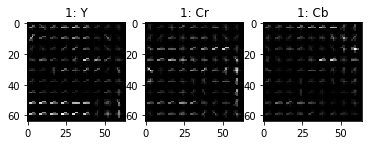

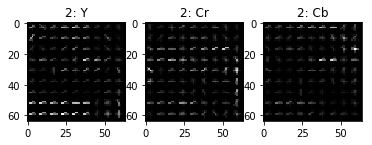

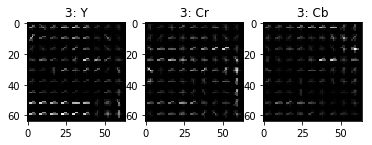

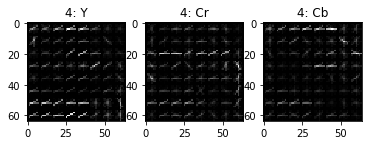

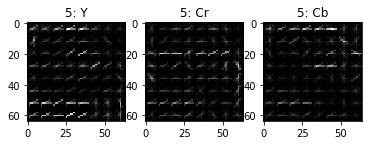

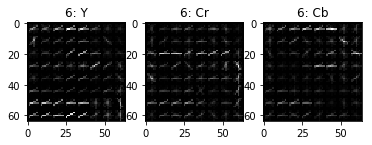

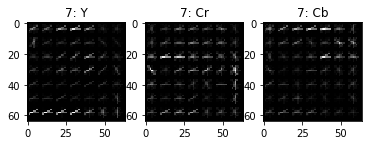

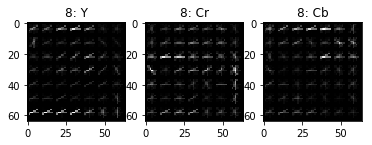

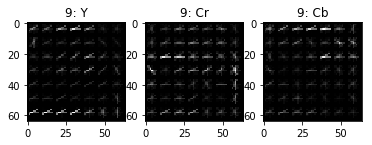

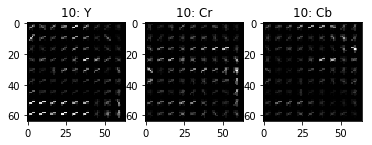

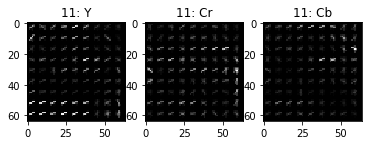

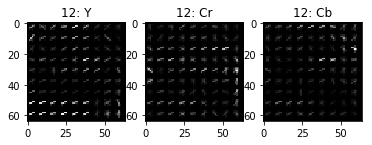

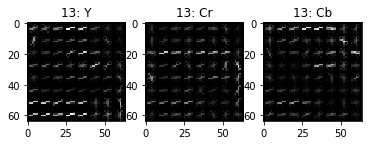

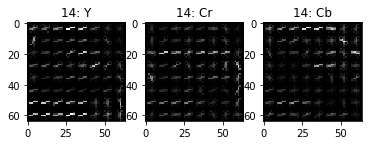

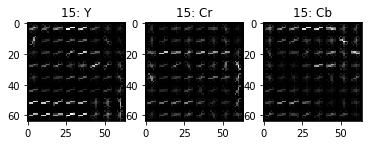

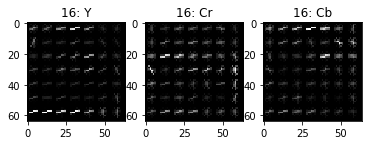

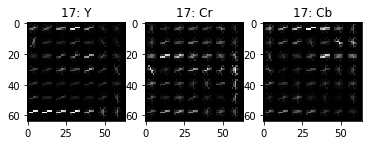

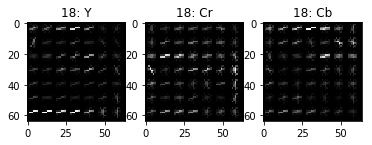

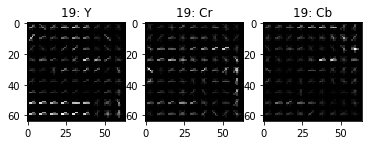

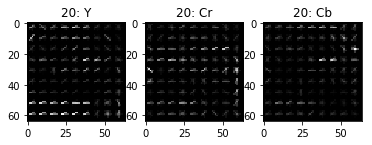

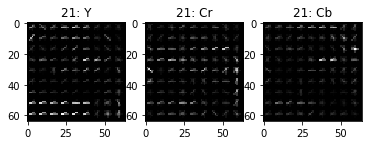

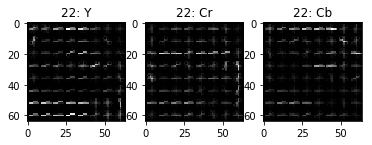

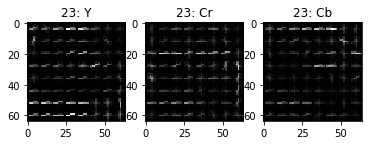

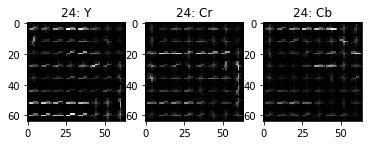

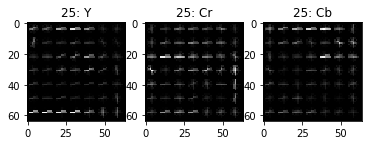

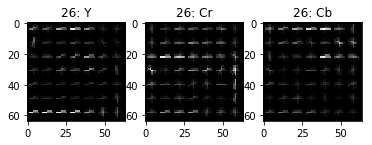

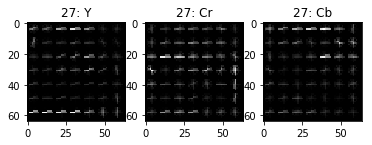

In [107]:
#### color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orients = np.linspace(8,10,3)  # HOG orientations
pix_per_cells = np.linspace(7,9,3) # HOG pixels per cell
cell_per_blocks = np.linspace(1,3,3) # HOG cells per block

pos = [131,132,133]
name = ['Y','Cr','Cb']
fig_count = 0
for orient in orients:
    for pix_per_cell in pix_per_cells:
        for cell_per_block in cell_per_blocks:
            fig_count = fig_count + 1
            feature_image = cv2.cvtColor(car_sample, cv2.COLOR_RGB2YCrCb)
            # Plot the examples
            title = str(fig_count) + ": Orient: " + str(orient) + " Pix: " + str(pix_per_cell) + " Cell: " + str(cell_per_block) 
            print(title)
            plt.figure()
            # Call our function with vis=True to see an image output
            for channel in range(feature_image.shape[2]):
                features, hog_image = get_hog_features(feature_image[:,:,channel], int(orient), 
                                    int(pix_per_cell), int(cell_per_block), vis=True, feature_vec=False)
                plt.subplot(pos[channel])
                plt.imshow(hog_image, cmap='gray')
                plt.title(str(fig_count) + ": " + name[channel])

In [38]:
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
hist_range = (0,1)
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, 700] # Min and max in y to search in slide_window()

car_features = extract_features(cars, cspace=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins,
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, cspace=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins,
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

/home/oilpig/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


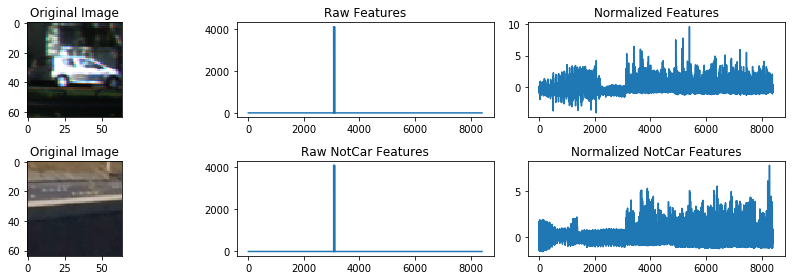

In [39]:
if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(car_features))
    notcar_ind = np.random.randint(0, len(notcar_features)) + len(car_features)
#     car_ind = 3
#     notcar_ind = 3 + 5
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(231)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(232)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(233)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    plt.subplot(234)
    plt.imshow(mpimg.imread(notcars[notcar_ind-len(car_features)]))
#     plt.imshow(mpimg.imread(notcars[notcar_ind-5]))
    plt.title('Original Image')
    plt.subplot(235)
    plt.plot(X[notcar_ind])
    plt.title('Raw NotCar Features')
    plt.subplot(236)
    plt.plot(scaled_X[notcar_ind])
    plt.title('Normalized NotCar Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

In [40]:
# Define the labels vector
y = np.hstack((np.ones(len(cars)), np.zeros(len(notcars))))
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
# svc = LinearSVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = SVC()
svc = GridSearchCV(svr, parameters)
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8412
3779.58 Seconds to train SVC...
Test Accuracy of SVC =  0.9944


In [41]:
print(len(scaled_X))
print(y.size)

17760
17760


In [42]:
test1 = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
test2 = np.array([1, 1, 2, 2])
print(len(test1))
print(test2.size)

4
4


## Sliding window search

In [120]:
# Define a function to draw bounding boxes
def draw_boxes_test(img, bboxes, color=(0, 0, 255), thick=6):
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
#         print(bbox)
        cv2.rectangle(img, bbox[0], bbox[1], color, thick)

def test_windows(img, ystart, ystop, scale):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    box_list = []
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell
          
            xbox_left = np.int(xleft*scale)
            ytop_draw = np.int(ytop*scale)
            win_draw = np.int(window*scale)
            box_list.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
                
    return box_list


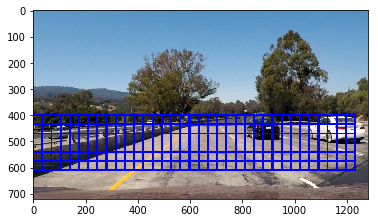

In [124]:
scale_range = 2
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block   
box_lists = []
ystart = 400
ystop = 656
img = mpimg.imread('./test_images/test1.jpg')
box_list_test = []

box_list = test_windows(img, ystart, ystop, scale)
draw_boxes_test(img, box_list, color=(0, 0, 255), thick=6)
    
# print(box_list)
plt.imshow(img)

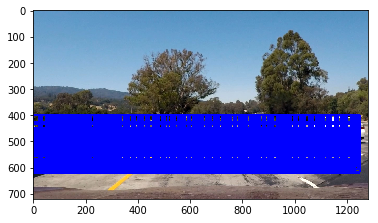

In [121]:
scale_range = np.linspace(1.5, 2.2, 7)
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block   
box_lists = []
ystart = 400
ystop = 656
img = mpimg.imread('./test_images/test1.jpg')
box_list_test = []
for scale in scale_range:
    box_list = test_windows(img, ystart, ystop, scale)
    draw_boxes_test(img, box_list, color=(0, 0, 255), thick=6)
    
# print(box_list)
plt.imshow(img)

In [58]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient,\
              pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    box_list = []
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            temp = np.hstack((spatial_features, hist_features, hog_features))

            # Scale features and make a prediction
            test_features = X_scaler.transform(temp.reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                box_list.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
                
    return draw_img, box_list

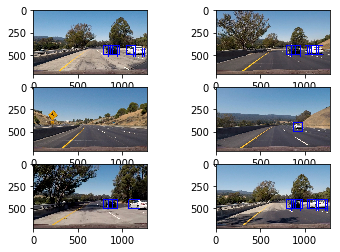

In [125]:
# Check the prediction time for a single sample
t=time.time()

testimages = glob.glob('./test_images/*.jpg')

ystart = 400
ystop = 656
scale = 1.6
# scale_range = np.linspace(0.5, 3.0, 5)
# for scale in scale_range:
#     print("current scale is ", scale)
pos = [321,322,323,324,325,326]
boxes_lists = []
detect_imgs = []

plt.figure()
for index, file in enumerate(testimages):
    image = mpimg.imread(file)

#     image = image.astype(np.float32)/255

#     windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
#                     xy_window=(96, 96), xy_overlap=(0.5, 0.5))

#     hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
#                         spatial_size=spatial_size, hist_bins=hist_bins, 
#                         orient=orient, pix_per_cell=pix_per_cell, 
#                         cell_per_block=cell_per_block, 
#                         hog_channel=hog_channel, spatial_feat=spatial_feat, 
#                         hist_feat=hist_feat, hog_feat=hog_feat)                       

#     window_img = draw_boxes(image, hot_windows, color=(0, 0, 255), thick=6)

    window_img, box_list = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    detect_imgs.append(window_img)
    boxes_lists.append(box_list)
    plt.subplot(pos[index])
    plt.imshow(window_img)

In [67]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

In [60]:
print(boxes_lists)

[[((793, 400), (895, 502)), ((819, 400), (921, 502)), ((844, 400), (946, 502)), ((844, 425), (946, 527)), ((870, 400), (972, 502)), ((1049, 400), (1151, 502)), ((1126, 425), (1228, 527)), ((1152, 425), (1254, 527))], [((793, 400), (895, 502)), ((819, 400), (921, 502)), ((844, 400), (946, 502)), ((844, 425), (946, 527)), ((998, 400), (1100, 502)), ((1024, 400), (1126, 502)), ((1049, 400), (1151, 502)), ((1075, 400), (1177, 502)), ((1100, 400), (1202, 502)), ((1100, 425), (1202, 527))], [], [((870, 400), (972, 502))], [((793, 400), (895, 502)), ((819, 400), (921, 502)), ((844, 400), (946, 502)), ((1075, 400), (1177, 502)), ((1100, 400), (1202, 502))], [((793, 400), (895, 502)), ((819, 400), (921, 502)), ((844, 400), (946, 502)), ((844, 425), (946, 527)), ((870, 400), (972, 502)), ((1024, 400), (1126, 502)), ((1049, 400), (1151, 502)), ((1100, 400), (1202, 502)), ((1126, 400), (1228, 502)), ((1126, 425), (1228, 527)), ((1152, 400), (1254, 502)), ((1152, 425), (1254, 527))]]


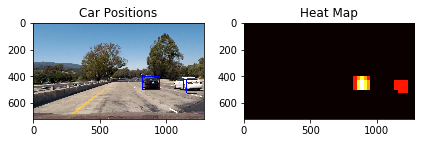

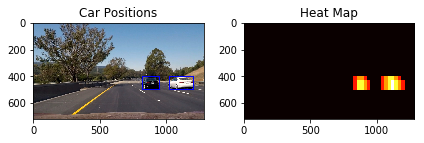

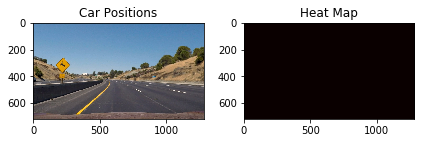

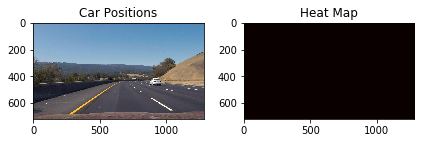

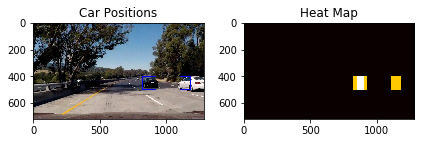

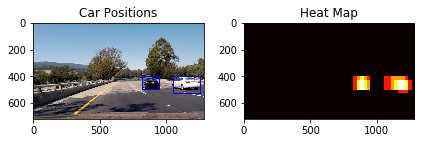

In [128]:
import cv2
from scipy.ndimage.measurements import label

for index, file in enumerate(testimages):
    image = mpimg.imread(file)
    heat = np.zeros_like(image[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat,boxes_lists[index])

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(draw_img)
    plt.title('Car Positions')
    plt.subplot(122)
    plt.imshow(heatmap, cmap='hot')
    plt.title('Heat Map')
    fig.tight_layout()

In [87]:
def car_detection_pipeline(file, filepath=False):
    
    plt.clf()
    
    if filepath == True:
        # Read in image
        raw = mpimg.imread(file)
    else:
        raw = file
        
    scale_range = np.linspace(1.5, 2.2, 7)
    
    box_lists = []
    for scale in scale_range:
        window_img, box_list = find_cars(raw, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
        box_lists.extend(box_list)
    
    heat = np.zeros_like(image[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    heat = add_heat(heat,box_lists)

    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,2)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(raw), labels)
    
#     plt.figure()
#     plt.imshow(draw_img)

    return draw_img

In [85]:
for file in testimages:
    plt.figure()
    img = car_detection_pipeline(file, filepath=True)

In [81]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [88]:
output = 'project_output_test_video.mp4'
clip1 = VideoFileClip("test_video.mp4")
output_clip = clip1.fl_image(car_detection_pipeline)
%time output_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video project_output_test_video.mp4
[MoviePy] Writing video project_output_test_video.mp4



 97%|█████████▋| 38/39 [19:03<00:30, 30.03s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_output_test_video.mp4 

CPU times: user 19min 4s, sys: 144 ms, total: 19min 4s
Wall time: 19min 5s


In [89]:
output = 'project_output_video.mp4'
clip1 = VideoFileClip("project_video.mp4")
output_clip = clip1.fl_image(car_detection_pipeline)
%time output_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video project_output_video.mp4
[MoviePy] Writing video project_output_video.mp4



 12%|█▏        | 146/1261 [1:09:27<8:54:27, 28.76s/it]


 23%|██▎       | 287/1261 [2:16:15<7:37:44, 28.20s/it]


 34%|███▍      | 428/1261 [3:22:36<6:31:33, 28.20s/it]


 45%|████▌     | 569/1261 [4:29:00<5:25:05, 28.19s/it]


 56%|█████▋    | 710/1261 [5:35:21<4:19:14, 28.23s/it]


 67%|██████▋   | 851/1261 [6:41:42<3:13:04, 28.26s/it]


 79%|███████▊  | 992/1261 [7:48:03<2:06:45, 28.27s/it]


 90%|████████▉ | 1130/1261 [8:52:57<1:01:33, 28.20s/it]


100%|█████████▉| 1260/1261 [9:54:05<00:28, 28.15s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_output_video.mp4 

CPU times: user 9h 54min 43s, sys: 3.94 s, total: 9h 54min 47s
Wall time: 9h 54min 6s
